### k-Nearest Neighbors Algorithm

- k-NN algorithm searches for k-nearest neighbors and returns the most similar instance as the prediction. 
- Model for k-NN is the entire training dataset.

k-NN comes in two forms : Classification and Regression
- Regression: prediction is the average of the k-nearest attribute.
- Classification: prediction is the most prevalent class.

**Supervised:** Uses labeled training data. <br>
**Instance based:** KNN models the problem using data instances in order to make predictive decisions. <br>
**Competitive learning** : Data instances compete to be most similar to a given unseen data instance and contribute to a prediction. <br>
**Non-parametric or non-linear:** It does not assume anything about the data or a functional form of the data.<br>
**Lazy learning** : It is lazy because it only builds a model during the time of prediction. <br>


One of the advantage of lazy learning characteristic is that it includes data relevant to the unseen data, called a localized model. But it's computationally expensive as it repeats the same search multiple times over the entire training data.<br>


## 1. k-NN Classifier

### Modeling steps:
- Get labeled data.
- Split the data into training and testing dataset.
- Choose k ( number of nearest neighbors)
- Calculate distance between new instance and every data point from the training dataset and fetch the nearest k data points. Here, we are working with euclidean distance to find the similar data points.
- Return the majority of the k-nearest class as prediction.
- Check for accuracy using the testing data.

### Load the data
For this problem we are going to work with the Iris dataset.

In [95]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
data = load_iris()

In [3]:
# Description about the data
# print(data.DESCR)

In [4]:
column_names = ["sepal_len","sepal_wid","petal_len","petal_wid"]
iris_df = pd.DataFrame(data.data,columns=column_names)
iris_df = iris_df.assign(target=list(data.target_names[data.target]))
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Train and test split

In [5]:
# split the data in the ratio of 70:30

X = np.array(iris_df.loc[:,column_names])
y = np.array(iris_df.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
X_train[:5,]

array([[5.5, 2.4, 3.7, 1. ],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 3.1, 5.5, 1.8],
       [6.6, 3. , 4.4, 1.4],
       [7.2, 3.6, 6.1, 2.5]])

**Feature Scaling**: If we want all features to contribute equally and no single feature to influence our prediction, we must do feature scaling. Most common ways of feature scaling is resacling the features with mean of 0 and standard deviation of 1 using **StandardScaler**, or using **MinMaxScaler** which transforms features by scaling each feature to a given range. Feature scaling is done on both training and testing dataset.

In [7]:
#mms = MinMaxScaler()
# OR
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Get k nearest neighbors

In [8]:
def euclidean_distance(row1, row2):
    return np.sqrt(np.sum((row1-row2)**2))

In [9]:
def get_neighbors(train, test_instance, neighbors):
    
    # calculate distance between each pair of test_instance and train data points
    distance = []
    for i in range(train.shape[0]):
        dist = euclidean_distance(train[i], test_instance)
        distance.append((i,dist))
    
    # select the top k data points based on smallest distance and return their index
    distance.sort(key=lambda x: x[1])
    nearest_index = []
    for i in range(neighbors):
        nearest_index.append(distance[i][0])
        
    return nearest_index

### Prediction

In [10]:
def predictClassifier(X_train, y_train, test_instance, neighbors):
    nearest_index = get_neighbors(X_train, test_instance, neighbors)
    votes = Counter(y_train[nearest_index])
    
    # find the most common label
    vote = sorted(votes.items(), key=lambda x: x[1], reverse=True)[0][0]
    
    return vote

In [11]:
def predict(X_test, X_train):
    votes = []
    for i in range(X_test.shape[0]):
        test_instance = X_test[i]
        votes.append(predictClassifier(X_train, y_train, test_instance, 5))
        
    return votes

### Evaluation metric : Accuracy

In [12]:
def accuracy():
    return np.sum(np.equal(y_test, predict(X_test, X_train)))/y_test.shape[0]

accuracy()

1.0

## 2. k-NN Regression

### Modeling steps:
- The only difference in classification and regression is that the later one returns the prediction as the mean of k-nearest data points.
- Evaluate with MSE using the testing data.

Working with boston data to predict the housing price.

In [44]:
from sklearn.datasets import load_boston
boston = load_boston()

In [45]:
X = boston.data
y = boston.target

In [43]:
# descriptiona about boston data set
# print(boston.DESCR)

In [46]:
# split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [47]:
def predictRegressor(X_train, y_train, test_instance, neighbors):
    nearest_index = get_neighbors(X_train, test_instance, neighbors)
    avg = np.mean(y_train[nearest_index])
    
    return avg

In [48]:
def predict(X_test, X_train):
    votes = []
    for i in range(X_test.shape[0]):
        test_instance = X_test[i]
        votes.append(predictRegressor(X_train, y_train, test_instance, 5))
        
    return np.array(votes)

In [49]:
# evaluation metric
def rmse(y_test, prediction):
    return round(np.sqrt(np.mean((y_test-prediction)**2)),4)

In [50]:
rmse(y_test, predict(X_test, X_train))

4.3399

### Comparing our model with sklearn model

In [51]:
class kNN():
    def __init__(self, n_neighbors):
        self.n_neighbors = n_neighbors
        
    def euclidean_distance(self, data1, data2):
        return np.sqrt(np.sum((data1-data2)**2))

    def get_neighbors(self, test_instance):
        distance = []
        for i in range(self.train.shape[0]):
            dist = self.euclidean_distance(self.train[i], test_instance)
            distance.append((i,dist))
    
        distance.sort(key=lambda x: x[1])
        nearest_index = []
        for i in range(self.n_neighbors):
            nearest_index.append(distance[i][0])
        
        return nearest_index
    
    def fit(self, x_train, y_train):
        self.train = x_train
        self.target = y_train
    

In [52]:
class kNN_Classifier(kNN):
    
    def predictClassifier(self, test_instance):
        nearest_index = self.get_neighbors(test_instance)
        votes = Counter(self.target[nearest_index])
        vote = sorted(votes.items(), key=lambda x: x[1], reverse=True)[0][0]
    
        return vote

    def predict(self, X_test):
        votes = []
        for i in range(X_test.shape[0]):
            test_instance = X_test[i]
            votes.append(self.predictClassifier(test_instance))
        
        return votes

    def accuracy(self, y_target, prediction):
        return np.sum(np.equal(y_target, prediction))/y_target.shape[0]

    

In [53]:
class kNN_Regressor(kNN):
    
    def predictRegressor(self, test_instance):
        nearest_index = self.get_neighbors(test_instance)
        avg = np.mean(self.target[nearest_index])
    
        return avg

    def predict(self, X_test):
        votes = []
        for i in range(X_test.shape[0]):
            test_instance = X_test[i]
            votes.append(self.predictRegressor(test_instance))
        
        return np.array(votes)

    def rmse(self, y_test, prediction):
        return round(np.sqrt(np.mean((y_test-prediction)**2)),4)
    

### Classification comparision

In [74]:
# fetch the data
X = np.array(iris_df.loc[:,column_names])
y = np.array(iris_df.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# feature-scaling
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

**sklearn KNeighborsClassifier** vs our model **kNN_Classifier**

In [75]:
clf_1 = KNeighborsClassifier(n_neighbors=5)
clf_1.fit(X_train, y_train)
pred = clf_1.predict(X_test)
accuracy_score(y_test, pred)

1.0

In [92]:
knn_c = kNN_Classifier(5)
knn_c.fit(X_train, y_train) 
prediction = knn_c.predict(X_test)
knn_c.accuracy(y_test, prediction)

1.0

*** Model performace as k value increases ***

In [93]:
score = []
for k in range(1,X_train.shape[0]):
    knn_c = kNN_Classifier(k)
    knn_c.fit(X_train, y_train) 
    prediction = knn_c.predict(X_test)
    score.append(knn_c.accuracy(y_test, prediction))
    

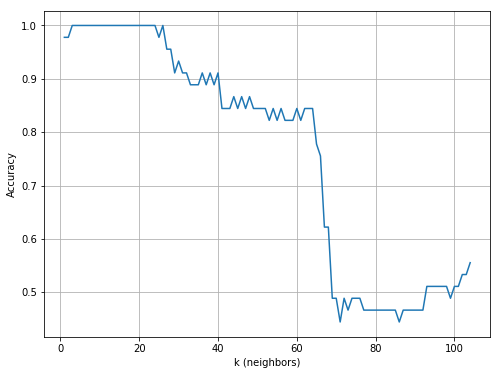

In [101]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,X_train.shape[0]),score)
plt.xlabel('k (neighbors)')
plt.grid()
plt.ylabel('Accuracy');

The above plot signifies as the value of k increases the performance of the model deteriorates after 25 neighbors. k from 1 to 20 gives an accuracy of 1.

### Regression comparision

In [102]:
# data
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 ,random_state=42)

# feature-scaling
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

**sklearn KNeighborsRegressor** vs our model **kNN_Regressor**

In [103]:
clf_2 = KNeighborsRegressor(n_neighbors=5)
clf_2.fit(X_train, y_train)
pred = clf_2.predict(X_test)
round(np.sqrt(mean_squared_error(y_test,pred)),4)

4.6671

In [104]:
knn_r = kNN_Regressor(5)
knn_r.fit(X_train, y_train) 
prediction = knn_r.predict(X_test)
knn_r.rmse(y_test, prediction)

4.6671

**Regression model performace with increasing k**

In [107]:
score = []
for k in range(1,X_train.shape[0]):
    knn_r = kNN_Regressor(k)
    knn_r.fit(X_train, y_train) 
    prediction = knn_r.predict(X_test)
    score.append(knn_r.rmse(y_test, prediction))

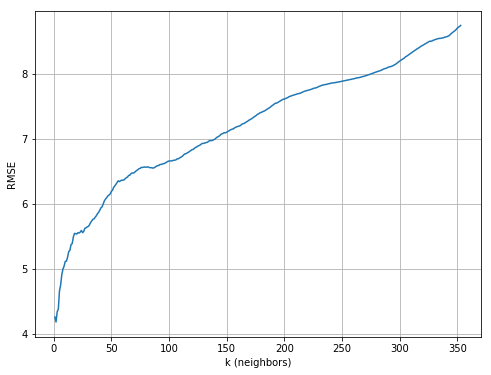

In [108]:
plt.figure(figsize=(8, 6))
plt.plot(range(1,X_train.shape[0]),score)
plt.xlabel('k (neighbors)')
plt.grid()
plt.ylabel('RMSE');

Lower k values gives less rmse suggesting we must choose smaller k.

**Both our models perform equally well like sklearn models.**

### How does the boundary change as k increases?

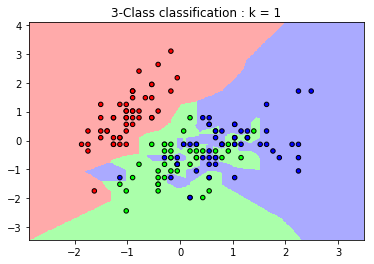

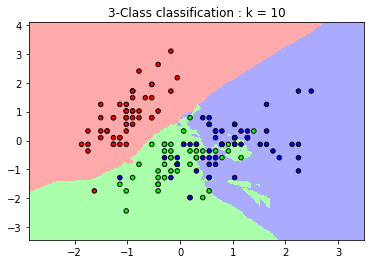

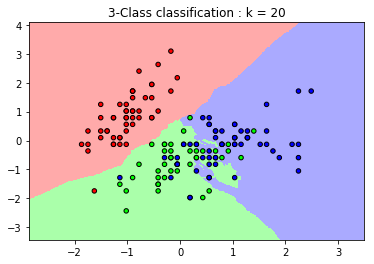

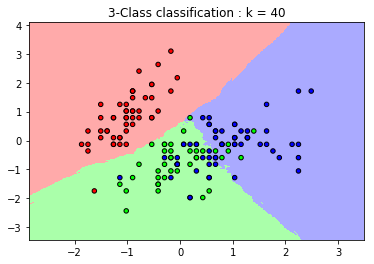

In [127]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

#plt.figure(figsize=(8,6))

n_neighbors = [1,10,20,40]

# we only take the first two features to plot
X = data.data[:, :2]
y = data.target

ss = StandardScaler()
X = ss.fit_transform(X)
#X_test = ss.transform(X_test)

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for n in n_neighbors:
    clf = KNeighborsClassifier(n)
    clf.fit(X, y)
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification : k = {n}")

plt.show();

With k=1, the model predicts the closest instance as the prediction class and overfits the data. With increasing k we can see, the model is able to define clear boundaries between separate classes. But as the k increases big enough the classes are not well separated and predicts with a bad accuracy.

## Conclusion

**Pros of k-NN**
- Simple and easy to apply and interpret
- Useful for ill-tempered data as it does not make any assumptions about distribution of data.
- No training 

**Cons of k-NN**
- High memory requirement - stores all of the data
- Computationally expensive - must compute all distances
- Sensitive to irrelevant features and the feature scaling

**k has to be a postive integer.**

**What is optimal value for k?**<br>
If number of classes is even, pick k to be odd to prevent ties. <br>
If number classes is odd, pick k to be even to lessen the chances of ties.<br>